# CS413 Image and Video Analysis -- Lab 1

## Department of Computer Science, University of Warwick
## October, 2022

## Aims:

The aims of this lab are to

+ learn about loading, displaying and saving images in Python using: `PIL` (Pillow), `numpy`  and `matplotlib` libraries
+ understand how images can be represented as arrays and performing simple manipulations on them
+ learn about what is meant by sampling and quantisation of images
+ know how to apply blurring operations to overcome aliasing artefacts
+ know about image colour channels and manipulating colour spaces
+ build a crude colour image compression by color channel subsampling

### Basic Image loading,  manipulation and visualisation

In [1]:
# import statements

from PIL import Image  # this contains the image class and methods from PIL library
import numpy as np  # this imports the numerical and array library 

import matplotlib.pyplot as plt  # this is for plotting (showing) images 

In [2]:
# load an image

# location of image data -- change this to wherever the lab data is kept
data_dir = '../data/'

image = Image.open(data_dir + 'bees.jpeg')

# print some information about the image

print('image format is ', image.format)
print('image mode is ', image.mode)
print('image size is ', image.size)

# the image size is the width x height

image format is  JPEG
image mode is  RGB
image size is  (3024, 4032)


In [3]:
# make the image into a numpy array, so we can access and manipulate the pixel values

im = np.asarray(image)

print('image array type ', im.dtype)
print('image array shape ', im.shape)

# notice how the size is now expressed as number of rows x num columns x num of channels

image array type  uint8
image array shape  (4032, 3024, 3)


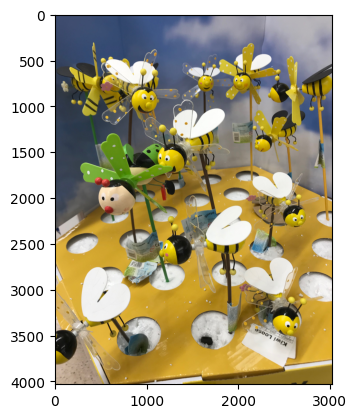

In [4]:
# now we can use pyplot.imshow to display the image

plt.imshow(im)
plt.show()

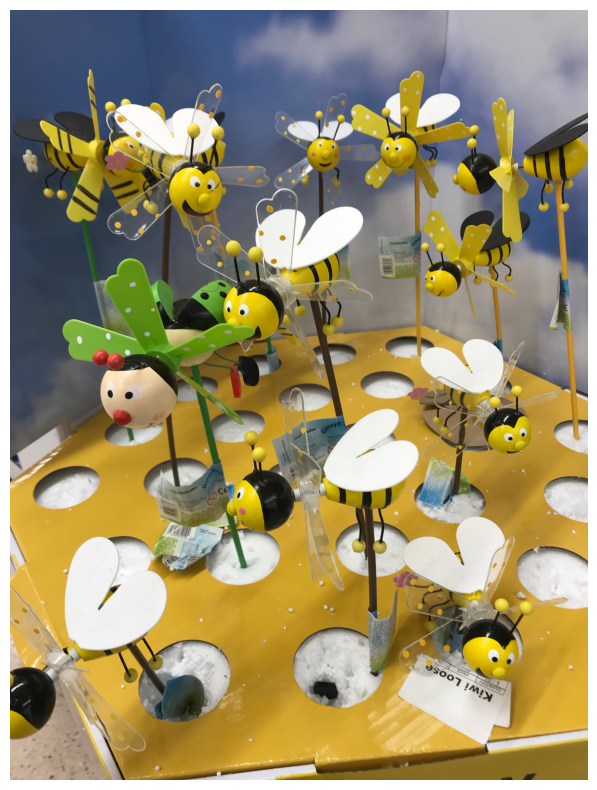

In [5]:
# if we want to make it bigger, remove the figure axis, we can do the following

fig = plt.figure(figsize=(10, 10))

plt.imshow(im)
plt.axis('off')

plt.show()

### Other ways to load images into `numpy` arrays...

You can also use the `matplotlib.pyplot.imread` function

~~~
    im = plt.imread(data_dir + 'bees.jpeg')
~~~

This time, `im` is already a `numpy` array:
    
~~~~
    print(im.shape)
    (4032, 3024, 3)
~~~~
Note that that the image values are normalised on read (to range [0,1]).

Note the order of the shape sizes is given as: 
~~~~
    height (number of rows), width (number of columns), number of colour channels
~~~~

In [6]:
im = plt.imread(data_dir + 'bees.jpeg')
print(im.shape)

(4032, 3024, 3)


## Image representation, numpy arrays and colour:

The image is stored as 3 arrays: `im[:,:,0]`, `im[:,:,1]`, `im[:,:,2]`, where the third index 
    `(0, 1, 2)` is the colour channel (here `0=Red`, `1=Green`, `2=Blue`)
    
## Exercise 1

1. Display the green channel of the 'bees' image
2. Create and show a binary image (which has only values 0 and 1), where the pixel value is 1 if the bees image 
    has more that 50% green (green values > 127)
3. Create and show a image where the intensity represents the yellowness of a pixel in the 'bees' image. 

    a. Note that the colour yellow is when the red and green values are approximately equal, *and* blue is zero (or very small).  So you can try to write an expression for this condition. Remember the output should be a single 'yellowness' score.

    b. Another way to solve this problem is to pick a particular yellow, e.g. Y = (255, 255, 0), or Y = (128, 128, 0), and calculate an image where each output pixel value is the *distance* of its (r, g, b) value from this colour 'coordinate'. The smaller this distance, the higher the 'yellowness' score. Hint: in numpy, you can get an Euclidean distance map `np.sum(np.square(im - Y), axis=2)`, where `im` is a M x N x 3 array and `Y` is a 1 x 3 array. 


    

### Exercise 1 problem 1

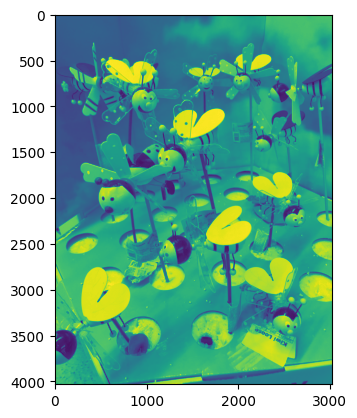

In [7]:
""" 
    Problem: Display the green channel of the 'bees' image. 
"""

green_layer = im[:, :, 1]
plt.imshow(green_layer)

### Exercise 1 problem 2

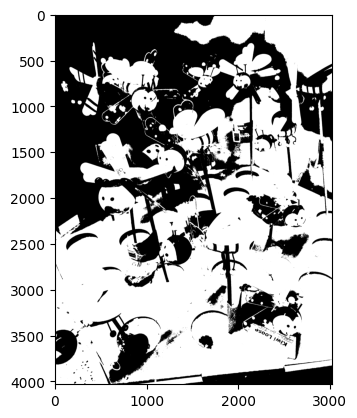

In [8]:
"""
    Problem: 
        Create and show a binary image (which has only values 0 and 1), 
        where the pixel value is 1 if the bees image has more that 50% green (green values > 127)
"""

binary_bee = np.where(green_layer > 127, 1, 0)
plt.imshow(binary_bee, cmap="grey")

### Exercise 1 problem 3

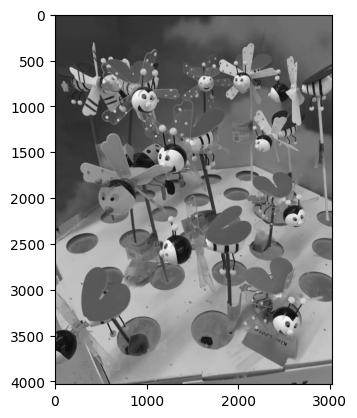

In [9]:
"""
    Problem:
        Create and show a image where the intensity represents the yellowness of a pixel in the 'bees' image.
            a. Note that the colour yellow is when the red and green values are approximately equal, and blue is zero (or very small). 
                So you can try to write an expression for this condition. Remember the output should be a single 'yellowness' score.
            b. Another way to solve this problem is to pick a particular yellow, e.g. Y = (255, 255, 0), or Y = (128, 128, 0), 
                and calculate an image where each output pixel value is the distance of its (r, g, b) value from this colour 'coordinate'. 
                The smaller this distance, the higher the 'yellowness' score. Hint: in numpy, 
                you can get an Euclidean distance map np.sum(np.square(im - Y), axis=2), where im is a M x N x 3 array and Y is a 1 x 3 array.
"""

"""
    Note:
        The goal of this question is to output a single-channel (grayscale) image, 
        in which the brightness of each pixel will be calculated from the yellowness of the original image. 
        This means that if a certain pixel in the original image is very "yellow" after calculation, 
        then the same position in the new image will be very "bright".
"""

Y = np.array((255, 255, 0))

# Calculate the distance (get the result from numpy) between `Y`
# axis = 2 means "3d layer", while axis = 1 means "row", and axis = 0 means "column"
# Equal to np.sqrt(np.sum(np.square(im - Y), axis=2))
# When operating the `np.sum(...)` step, the out will become a single-channel ndarray.
distances = np.linalg.norm(im - Y, axis=2)

# Since the output from Euclidean distance may over than 255,
# We can proportionally map the actual numbers into the range of 255.
normalized_distances = distances / np.sqrt(255 ** 2 + 255 ** 2 + 255 ** 2)
scaled_distances = normalized_distances * 255

yellowness_threshold = 255

yellowness_score = yellowness_threshold - scaled_distances
plt.imshow(yellowness_score.astype(np.uint8), cmap="grey")

### Selecting rectangular regions of an image

This can be done using array indexing....

block has shape  (256, 256, 3)


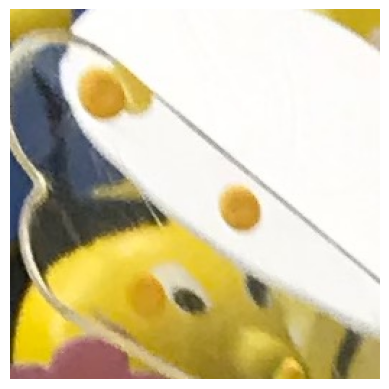

In [10]:
# We can select parts of the original image by using array range indexing

# remember that numpy arrays can be indexed using the colon (slicing) operator to indicate a range of indexes
# e.g. a[0:10] selects the first 10 values of the array a
# for example

block = im[512:768, 512:768]  # select a region of size 256 x 256 at (512, 512)
print('block has shape ', block.shape)

plt.axis('off')
plt.imshow(block)
plt.show()

## Exercise 2

In this exercise, I want you to select 10 random blocks of size 128 x 128 from the image. 


### Random numbers
To do this, we need to be able to generate random integers and `numpy.random.randint()` can do this,

e.g. 
~~~~
    height = im.shape[0] 
    width = im.shape[1]
    x = np.random.randint(width) # one random number in range [0, width-1]
    y = np.random.randint(height) # one random number in range [0, height-1]
~~~~

### Display multiple images in one figure

To display your 10 images togehter in one figure, you can use pyplot.suplot().

e.g.
~~~~
    # show the kth plot
    plt.subplot(2,5, k) # plot k in an array of plots 2 rows x 5 columns
    plt.imshow(block)
    plt.axis('off')
~~~~

### Loop?

Note that to solve this exercise, you need to use a for loop, e.g. something like 
~~~~
    height = im.shape[0]
    width = im.shape[1]

    block_size = 128

    for i in range(10):

        # select random position of image block

        # extract image block
        
        # display image block in subplot
        
        
    plt.show()
~~~~
   

### Exercise 2 solution

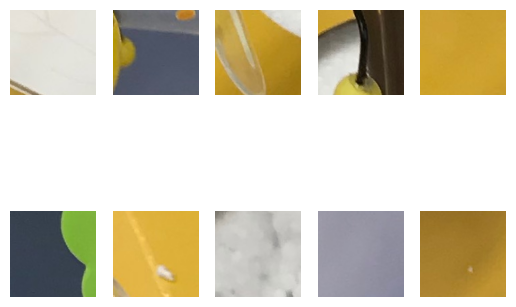

In [11]:
def generate_random_coordinate(x_max: int, y_max: int) -> tuple[int, int]:
    x_ = np.random.randint(x_max)
    y_ = np.random.randint(y_max)
    return x_, y_


def plot_img_to_non_axis_board(
        row: int, 
        col: int, 
        img_index: int, 
        block_: np.ndarray, 
        interpolation=None,
        cmap=None
) -> plt.Axes:
    axis_ = plt.subplot(row, col, img_index + 1)
    plt.imshow(block_, interpolation=interpolation, cmap=cmap)
    plt.axis('off')
    return axis_


block_size = 128

# In order to prevent any output with wrong size, we should remove some range for generating random coordinates.
available_height_max = im.shape[0] - block_size
available_width_max = im.shape[1] - block_size

for i in range(10):
    x, y = generate_random_coordinate(available_width_max, available_height_max)
    block = im[y:y + block_size, x:x + block_size]
    plot_img_to_non_axis_board(2, 5, i, block)

plt.show()

## Subsampling and Aliasing artefacts

The numpy slicing operator can also select the step of the index range, 
e.g. `a[0:10:2]` will select the first, third, fifth, seventh and ninth element, i.e. it will select every other
element of the given range.

We can use this do image subsampling.
~~~~
    im_subx2 = im[::2,::2] # image subamplex by a factor of 2
~~~~

subsampled size is  (2016, 1512, 3)


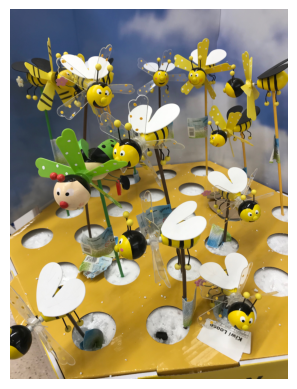

In [12]:
# subsample and display the bees image

im_subx2 = im[::2, ::2]

print('subsampled size is ', im_subx2.shape)

plt.axis('off')
plt.imshow(im_subx2)

## Exercise 3 -- Downsampling and upsampling

It is not easy to see what the subsampling is doing to the bees image content (other than reducing the resolution).
Instead, we can use an FM test pattern image (`testimage512.gif`) to visualise the artefacts created in the
spatial frequencies.

1. Load the and display the image `testimage512.gif` which is in the data directory.

~~~~
    fm = np.asarray(Image.open(data_dir + 'testimage512.gif'))

    print(fm.shape, fm.dtype)
    fig = plt.figure(figsize=(8,8))
    plt.axis('off')
    plt.imshow(fm, interpolation='sinc', cmap='gray') # use 'sinc' interpolation in imshow 
    plt.show()
~~~~

(Note we have to use a better display interpolation for the `imshow()` to avoid seeing display artefacts!)

2. Use `plt.subplot()` to display side-by-side the testimage at resolutions which are reduced by factors 2, 4, and 8.

3. Work out how to upsample the image by pixel duplication. Write a function to upsample an image, e.g.:

~~~~
    def upsample(im, size=2):
    
        # define an array of zeros of twice the size of the input im
        output = np.zeros(...)
        
        # do a nested for loop to broad cast values from input to output
        
        for i in ... : # step in size
            for j in ... : # step in size
                
                output[i:i+size,j:j+size] = im[i//size,j//size] # broad cast values
                
        return output
~~~~
                
4. Use your function to upsample the downsampled image and display the results.


### Exercise 3 Solution - Down sample

(512, 512) uint8


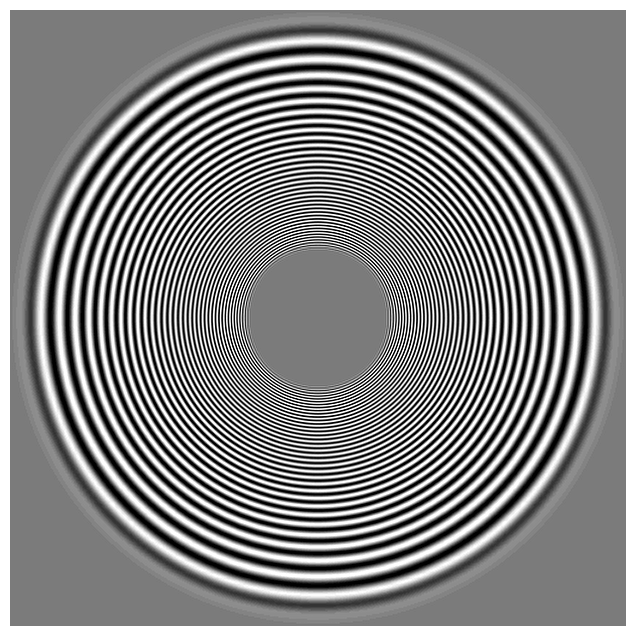

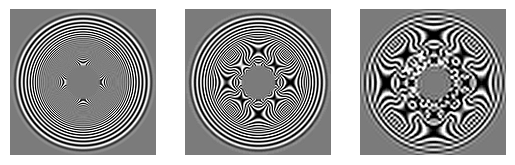

In [13]:
# Load the fm picture.

fm = np.asarray(Image.open(data_dir + 'testimage512.gif'))
print(fm.shape, fm.dtype)
fig = plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(fm, interpolation='sinc', cmap='grey')
plt.show()

# Reduced subplots
reduce_factors = (2, 4, 8)

for i, factor in enumerate(reduce_factors):
    reduced = fm[::factor, ::factor]
    plot_img_to_non_axis_board(1, 3, i, reduced, interpolation='sinc', cmap='grey')

plt.show()

### Exercise 3 Solution - Up sample

(1024, 1024) uint8


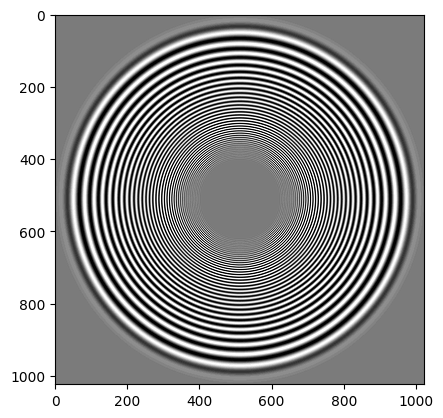

In [14]:
# The most efficient way to do the up-sample
upsampled = fm.repeat(2, axis=0).repeat(2, axis=1)
print(upsampled.shape, fm.dtype)
plt.imshow(upsampled, interpolation='sinc', cmap='grey')

## Antialiasing using blurring

Aliasing is caused by not having a sufficient sampling rate for the frequencies present in the signal. 

To reduce the effects of aliasing when subsampling, we can attenuate (reduce) the high-frequencies above the Nyquist
rate (twice the sampling rate) by blurring (low-pass filtering).

The simplest form of low-pass filtering is blurring by local averaging.


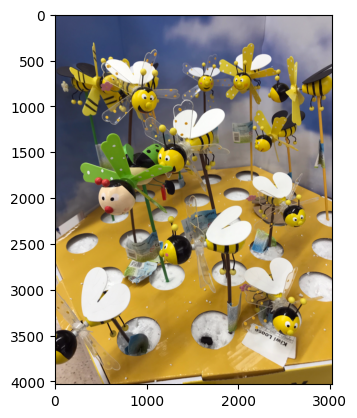

In [15]:
def local_average(image_: np.ndarray, kernel_size: int = 3) -> np.ndarray:
    # Ensure kernel_size is odd to have a valid center pixel
    if kernel_size % 2 == 0:
        raise ValueError("kernel_size should be odd.")

    # Get the dimensions of the image and kernel
    # We use dict to ensure the image_depth will become None when image not have depth.
    dim_dict = dict(enumerate(image_.shape))
    image_height, image_width, image_depth = (dim_dict.get(d, 1) for d in range(3))
    
    # Determine the dimensionality
    is_3d = image_.ndim == 3

    # Create a local averaging kernel (2D)
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)

    # Calculate the padding needed for 'same' convolution
    pad_size = kernel_size // 2

    # Pad the image using reflection padding
    # Pads with the reflection of the vector mirrored on the first and last values of the vector along each axis.
    # Here we only need to pad the height and width dimensions, so we set the pad_width for the depth dimension to (0, 0)
    pad_width_3d = ((pad_size, pad_size), (pad_size, pad_size), (0, 0))
    pad_width_2d = ((pad_size, pad_size), (pad_size, pad_size))
    padded_image = np.pad(image_, pad_width_3d if is_3d else pad_width_2d, mode='reflect')

    # Create an output image with the same shape as the input image
    output_image = np.zeros_like(image_)

    # Get the max value of the image dtype
    max_val_of_image_type = np.iinfo(image_.dtype).max

    for channel in range(image_depth):
        rolling_windows = np.lib.stride_tricks.sliding_window_view(
            padded_image[:, :, channel] if is_3d else padded_image,
            kernel.shape,
        )

        # The reason why we only sum axis = 2 and 3 is because the sliding_window_view will produce a 4D array which shape is (image_height, image_width, kernel_size, kernel_size).
        # So we need to sum the last two dimensions to get the result of convolution.
        smoothed_channel = np.sum(rolling_windows * kernel, axis=(2, 3))

        # Map the smoothed_channel from float64 to image_ dtype
        min_val = np.min(smoothed_channel)
        max_val = np.max(smoothed_channel)
        
        # Map the smoothed_channel from float64 to image_ dtype
        smoothed_channel_mapped = (
            ((smoothed_channel - min_val) / (max_val - min_val) * max_val_of_image_type)
            .astype(np.uint8)
        )

        if is_3d:
            output_image[:, :, channel] = smoothed_channel_mapped
        else:
            output_image = smoothed_channel_mapped

    return output_image


plt.imshow(local_average(im, 5))

## Exercise 4 -- Antialiasing

This exercise you will use blurring prior to sub-sampling to antialias the image:
    
1. Use the function `local_average` to blur the FM test pattern image and show its effect for averaging 
    regions of different sizes, (e.g. 3, 5, 7)
    
2. Write a new function called `antialias_subsample` which where you take an input image, blur it and then sub-sample.

3. Use your new function to show the compare a subsampled FM test pattern with and without the antialiasing blur.



### Exercise 4 Solution 1

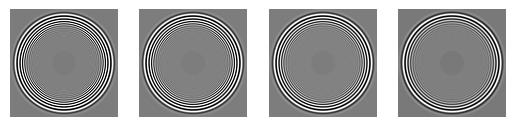

In [16]:
blur_kernel_sizes = (3, 5, 7, 9)

for i, size in enumerate(blur_kernel_sizes):
    blurred = local_average(fm, size)
    plot_img_to_non_axis_board(1, 4, i, blurred, interpolation='sinc', cmap='grey')

plt.show()

### Exercise 4 Solution 2

In [17]:
def antialias_subsample(image_: np.ndarray, blur_kernel_size: int = 3, reduce_factor: int = 2) -> np.ndarray:
    blurred_ = local_average(image_, blur_kernel_size)
    sub_sampled = blurred_[::reduce_factor, ::reduce_factor]
    return sub_sampled

### Exercise 4 solution 3

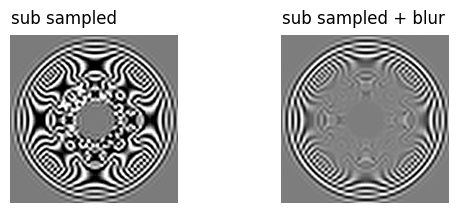

In [40]:
sub_sample_factor = 8
blur_kernel_factor = 7

only_sub_sampled = fm[::sub_sample_factor, ::sub_sample_factor]
blurred_and_sub_sampled = antialias_subsample(fm, blur_kernel_factor, sub_sample_factor)

plot_img_to_non_axis_board(2, 2, 0, only_sub_sampled, interpolation='sinc', cmap='grey')
plt.text(0, -5, "sub sampled", fontsize=12)

plot_img_to_non_axis_board(2, 2, 1, blurred_and_sub_sampled, interpolation='sinc', cmap='grey')
plt.text(0, -5, "sub sampled + blur", fontsize=12)

plt.show()

## Quantisation by bit-shift operations

We can quantise the image range (for images this is usually 0..255) and visualise what happens if we quantise 
    the range to fewer levels, e.g. (128=7 bits, 64=6 bits, 32=5 bits, 16=4 bits, etc.).
    

In `numpy`, bytes can be represented by variable of data type `uint8` (unsigned integer, 8 bits), e.g.
~~~~
    a = np.uint8(10) # byte with value 10
~~~~

We can then left-shift or right-shift this value which multiples or divides by a factor of 2, e.g.
~~~~
    print(a<<1) # should print 20
    
    print(a>>1) # should print 5
~~~~

In Python we can print out the binary representation like this

~~~~
    print("{0:b}".format(a))
~~~~
To quantise a number to say 4 bits, we therefore need to right-shift by 4, e.g. 

~~~~
    a = np.uint8(57) # binary is [00111001]
    
    print("a is {0:b}".format(b)) 
    print("a right-shift 4 is {0:b}".format(a>>4)) 
~~~~

We can then re-express the number in 8-bits by left-shifting the quantised value.
~~~~
        print("a quanited (in 0-255) range is {0:b}".format((a>>4)<<4))) 
        
~~~~
Therefore with an image of type `uint8`, we can quantise it by right-shifting all the pixel values and then left-shifting them.


In [19]:

a = np.uint8(57)  # make it 8 bits

print("a is {0:b}".format(a))

print("a right-shift 4 is {0:b}".format(a >> 4))  # right-shift (quantise)
print("a right-shift then left-shift 4 is {0:b}".format((a >> 4) << 4))  # left-shift to see what it does

# print out the decimal values
print("a in 8 bits is ", a, ', quantised it becomes ', ((a >> 4) << 4))

a is 111001
a right-shift 4 is 11
a right-shift then left-shift 4 is 110000
a in 8 bits is  57 , quantised it becomes  48


## Exercise 5 -- Image quantisation

1. Using the bit shifting method, write a function to quantize an input image to an arbirary number of bits between 1 and 8.

~~~~
    def quantise_image(im, bits=8):
    
        quantised = ...   # quantise to bits number of bits
        
        output = ... # remap to range 0..255 by reversing quantisation
        
        return output
~~~~

2. Show the effect of quantisation on the `peppers.jpg` image.

3. Make a scalar image of the quantisation errors or 4-bit quantisation. 
    1. Where are the quantisation errors in the image?
    2. Where are the quantisation errors most visible?


### Exercise 5 solution

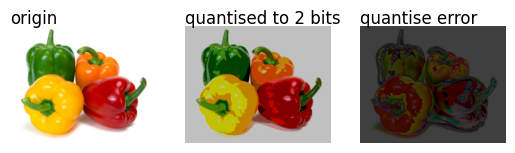

In [53]:
def quantise_image(im_, bits=8):
    shifts = 8 - bits
    quantised_ = np.right_shift(im_, shifts)
    output = np.left_shift(quantised_, shifts)
    return output

pm = plt.imread(data_dir + 'peppers.jpg')

quantised = quantise_image(pm, 2)

err_of_quantised = pm - quantised

plot_img_to_non_axis_board(2, 3, 0, pm)
plt.text(0, -10, "origin", fontsize=12)

plot_img_to_non_axis_board(2, 3, 1, quantised)
plt.text(0, -10, "quantised to 2 bits", fontsize=12)

plot_img_to_non_axis_board(2, 3, 2, err_of_quantised)
plt.text(0, -10, "quantise error", fontsize=12)

plt.show()

## Colour conversion and Colour channel data compression

We can convert image pixels from a RGB colour space to a luminance-chromanance colour space, 
    e.g. YCbCr using utility functions defined.
    
Here are two functions which do this operation.

~~~~
    def rgb2ycbcr(im):
        xform = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
        
        ycbcr = im.dot(xform.T)
        ycbcr[:,:,[1,2]] += 128
        
        return np.uint8(ycbcr)

    def ycbcr2rgb(im):
        xform = np.array([[1, 0, 1.402], [1, -0.34414, -.71414], [1, 1.772, 0]])
        
        rgb = im.astype(np.float)
        
        rgb[:,:,[1,2]] -= 128
        rgb = rgb.dot(xform.T)
        
        np.putmask(rgb, rgb > 255, 255)
        np.putmask(rgb, rgb < 0, 0)
        
        return np.uint8(rgb)
~~~~

Can you work out what they are doing?

## Exercise 6 -- Colour conversion and colour channel 'compression'

1. Define the two methods and use them to display the Y, Cb and Cr channels of the `peppers.jpg` image as gray-scale images.

2. Use the `local_average` method to blur the Cb and Cr channels (either or both) and then convert them 
    back to a RGB image. Compare the the original image and the blurred Cb/Cr channel images. 
    
3. Repeat the previous exercise but this time subsample and upsample the Cb/Cr images instead of blurring them.

4. How much blurring/subsampling/upsampling can you do before you it starts to affect the reconstituted RGB image?

5. By reducing the sizes of the Cb/Cr images by subsampling, we are in effect compressing the data. 
   
   What is the compression factor if you subsample by some power-of-two factor $ F = 2^M $, where $ M = 1, 2, 3, ... $?